## poisson intervals distribution

mean:9934
max:126708
[np.float64(8255.0), np.float64(5849.0), np.float64(3710.0), np.float64(40570.0), np.float64(2040.0), np.float64(4739.0), np.float64(4807.0), np.float64(6842.0), np.float64(8222.0), np.float64(4020.0), np.float64(429.0), np.float64(13607.0), np.float64(34187.0), np.float64(4904.0), np.float64(195.0), np.float64(13858.0), np.float64(4104.0), np.float64(42019.0), np.float64(6771.0), np.float64(482.0), np.float64(6294.0), np.float64(53011.0), np.float64(434.0), np.float64(8366.0), np.float64(206.0), np.float64(4699.0), np.float64(116.0), np.float64(3701.0), np.float64(3223.0), np.float64(19249.0), np.float64(16487.0), np.float64(9504.0), np.float64(27083.0), np.float64(1405.0), np.float64(56852.0), np.float64(404.0), np.float64(2877.0), np.float64(19680.0), np.float64(685.0), np.float64(1718.0), np.float64(15282.0), np.float64(1003.0), np.float64(6168.0), np.float64(2416.0), np.float64(2115.0), np.float64(11139.0), np.float64(12934.0), np.float64(43153.0), np.float64(

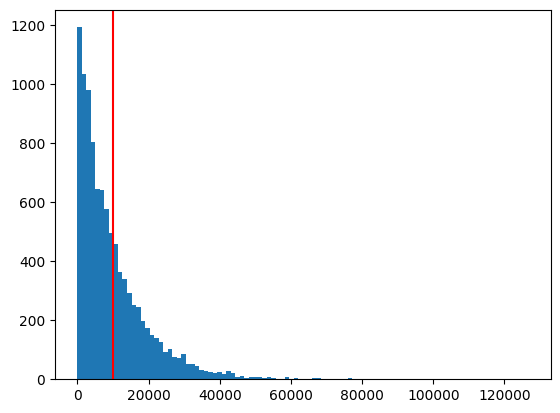

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stepsLenght = []
for i in range(10000):
    roll= np.ceil(np.random.exponential(10000))
    stepsLenght.append(roll)
    # print(roll)

stepsPos = [0] * len(stepsLenght)
        
for i in range(len(stepsLenght)):
    if(i == 0):
        stepsPos[0] = 100
    else:
        stepsPos[i] = stepsPos[i-1] + stepsLenght[i]

plt.hist(stepsLenght,100)
plt.axvline(np.mean(stepsLenght), color='red')
print("mean:" + str(int(np.mean(stepsLenght))) +"\nmax:" + str(int(np.max(stepsLenght))))
print(stepsLenght)
print(stepsPos)

#sns.distplot(np.random.exponential(size=1000000), hist=True)


# test #1

## graph

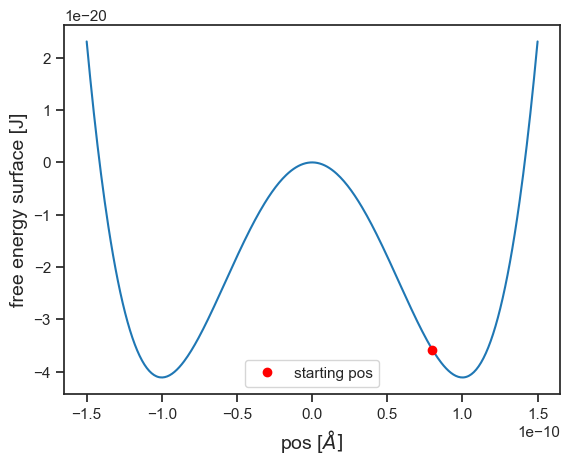

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

x = np.linspace(-1.5E-10, 1.5E-10, 376)
y = []
A = 4.11E20
B = 8.22
for i in x:
    y.append(A*i**4-B*i**2)

plt.plot(x,y)
pos = 0.8e-10
plt.plot(pos, A*pos**4-B*pos**2, 'ro', label="starting pos")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("free energy surface [J]")
plt.legend()


## pos vs time

443000 937142 without
407000 937143 without
291000 937144 without
216000 937145 without
301000 937146 without
181000 937147 without
251000 937148 without
301000 937149 without
419000 937150 without
257000 937151 without
161000 937152 without
408000 937153 without
276000 937154 without
321000 937155 without
326000 937156 without
232000 937142 with
187000 937143 with
144000 937144 with
225000 937145 with
357000 937146 with
232000 937147 with
324000 937148 with
293000 937149 with
230000 937150 with
199000 937151 with
226000 937152 with
378000 937153 with
304000 937154 with
165000 937155 with
155000 937156 with
without:303933
with:243400


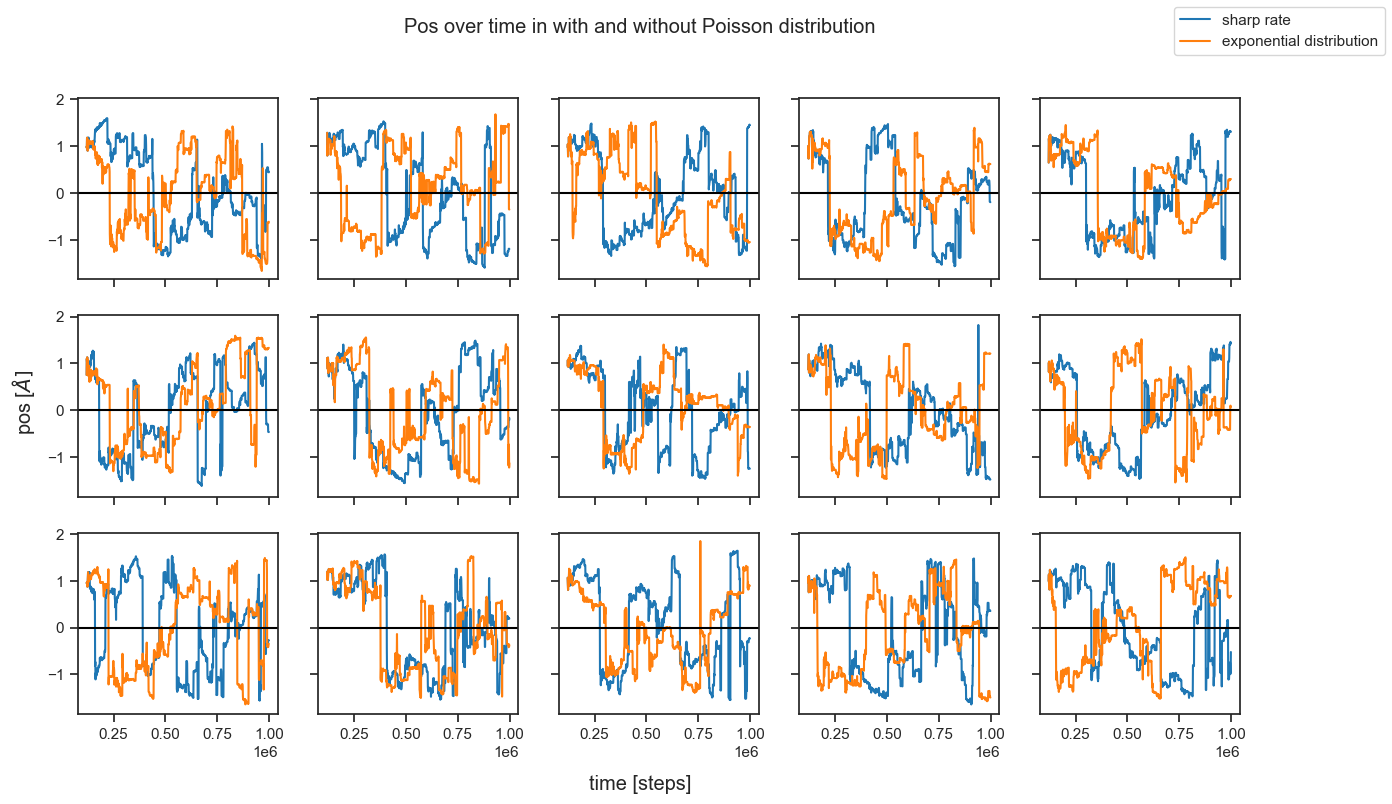

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')
rows = 3 
colums = 5
fig, axes = plt.subplots(rows, colums, figsize=(15,8), sharex=True, sharey=True)

fig.suptitle("Pos over time in with and without Poisson distribution")

seeds = []
for i in range(0, 15):
  seeds.append(937142 + i)

sumWithout = 0
for i, seedNum in enumerate(seeds):
    xyz = open("SimForMetaD_low" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    # plt.plot(time, posX, label= seedNum)
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "sharp rate")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[0,3].plot(time, posX)
        case 4:
            axes[0,4].plot(time, posX)
        case 5:
            axes[1,0].plot(time, posX)
        case 6:
            axes[1,1].plot(time, posX)
        case 7:
            axes[1,2].plot(time, posX)
        case 8:
            axes[1,3].plot(time, posX)
        case 9:
            axes[1,4].plot(time, posX)
        case 10:
            axes[2,0].plot(time, posX)
        case 11:
            axes[2,1].plot(time, posX)
        case 12:
            axes[2,2].plot(time, posX)
        case 13:
            axes[2,3].plot(time, posX)
        case 14:
            axes[2,4].plot(time, posX)
            
    for j in range(1, len(posX)):
        if(posX[j -1] * posX[j] < 0):
            sumWithout += time[j]
            print(str(int(time[j])) + " " + str(seedNum) +  " without")
            break

sumWith = 0
for i, seedNum in enumerate(seeds):
    xyz = open("SimForMetaD_lowWithDist" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    # plt.plot(time, posX, label= seedNum)
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "exponential distribution")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[0,3].plot(time, posX)
        case 4:
            axes[0,4].plot(time, posX)
        case 5:
            axes[1,0].plot(time, posX)
        case 6:
            axes[1,1].plot(time, posX)
        case 7:
            axes[1,2].plot(time, posX)
        case 8:
            axes[1,3].plot(time, posX)
        case 9:
            axes[1,4].plot(time, posX)
        case 10:
            axes[2,0].plot(time, posX)
        case 11:
            axes[2,1].plot(time, posX)
        case 12:
            axes[2,2].plot(time, posX)
        case 13:
            axes[2,3].plot(time, posX)
        case 14:
            axes[2,4].plot(time, posX)

    for j in range(1, len(posX)):
        if(posX[j -1] * posX[j] < 0):
            sumWith += time[j]
            print(str(int(time[j])) + " " + str(seedNum) + " with")
            break            


fig.supxlabel("time [steps]")
fig.supylabel(r"pos [$\AA ]$", x = 0.08)
for i in range(rows):
    for j in range(colums):
        axes[i][j].axhline(0, color = 'black')

print("without:" + str(int(sumWithout / (rows * colums))) + "\nwith:" + str(int(sumWith / (rows * colums))))

fig.legend()


## original free energy surface

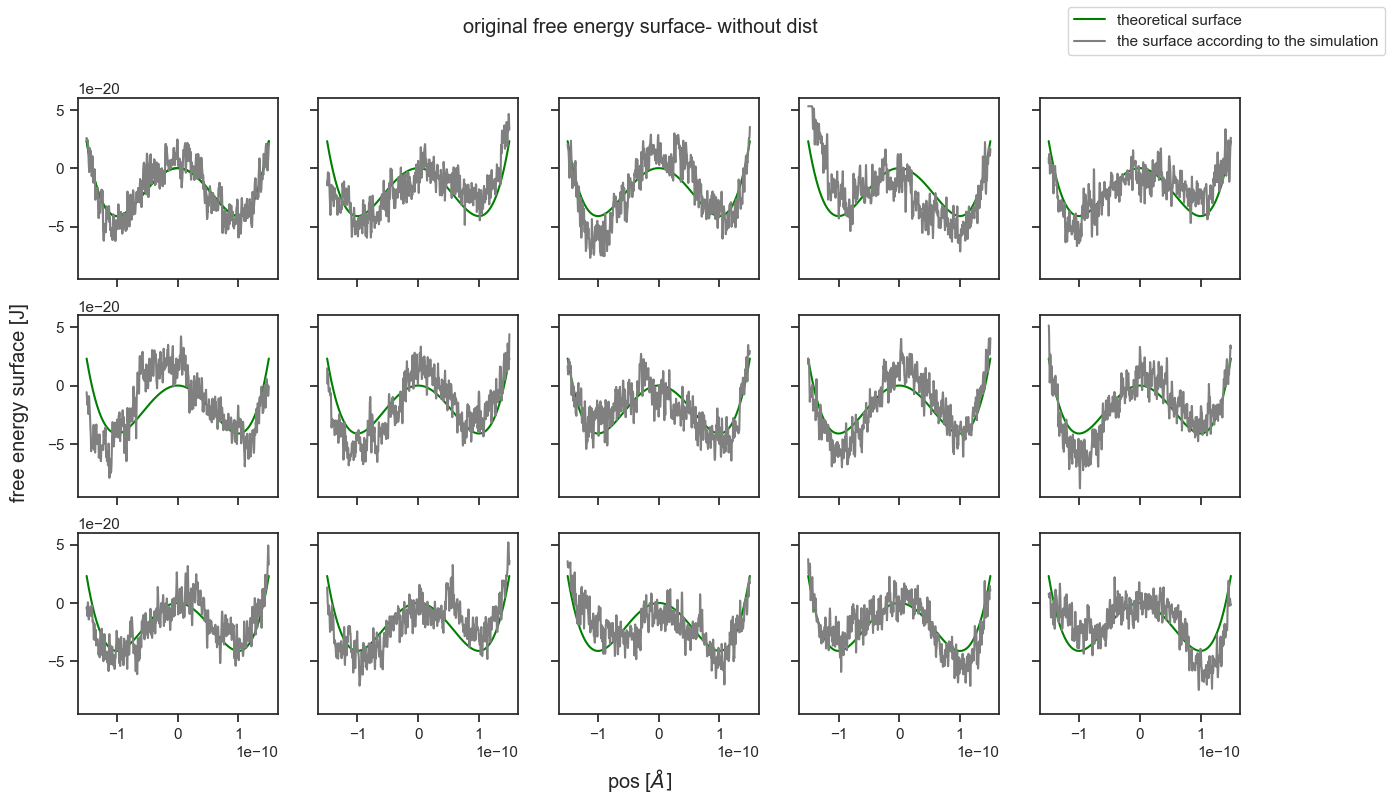

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

rows = 3 
colums = 5
fig, axes = plt.subplots(rows, colums, figsize=(15,8), sharex=True, sharey=True)

seeds = []
for i in range(0, 15):
  seeds.append(937142 + i)

x = np.linspace(-1.5E-10, 1.5E-10, 880)
w = 2E-20
sigma = 0.5e-12
y = []
A = 4.11E20
B = 8.22
for i in x:
    y.append(A*i**4-B*i**2)

A = []
for i, seedNum in enumerate(seeds): 
    df = pd.read_csv("gaussiansPos_1st_1000_" + str(i) + ".log", sep='\s+')
    #df = pd.read_csv("gaussiansPos.log", sep='\s+')
    pos = df['X']
    arr = []
    for j in x:
        arr.append(-w * np.exp(-(np.array(j-pos)) ** 2 / (2 * sigma ** 2)).sum(0) + 0.53e-19)
    A.append(arr)


fig.suptitle("original free energy surface- without dist")
fig.supxlabel(r"pos [$\AA ]$")
fig.supylabel(r"free energy surface [J]", x = 0.08)
c = 0
for i in range(rows):
    for j in range(colums):
        if(i == 0 and j == 0):
            axes[i][j].plot(x, y, color='green', label='theoretical surface')
            axes[i][j].plot(x, A[c], color='gray',label='the surface according to the simulation')
        axes[i][j].plot(x, y, color='green')
        axes[i][j].plot(x, A[c], color='gray')
        c += 1

fig.legend()


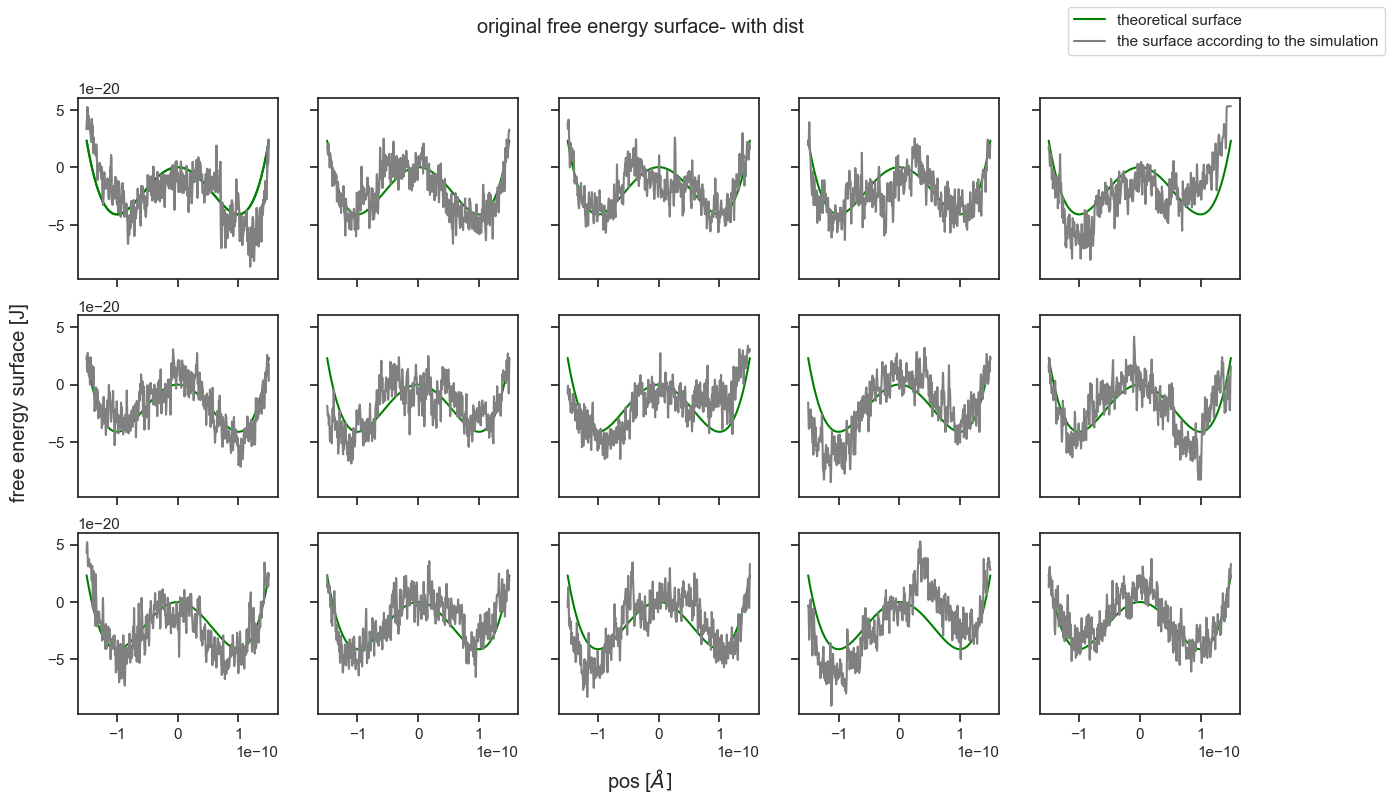

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

rows = 3 
colums = 5
fig, axes = plt.subplots(rows, colums, figsize=(15,8), sharex=True, sharey=True)

seeds = []
for i in range(0, 15):
  seeds.append(937142 + i)

x = np.linspace(-1.5E-10, 1.5E-10, 880)
w = 2E-20
sigma = 0.5e-12
y = []
A = 4.11E20
B = 8.22
for i in x:
    y.append(A*i**4-B*i**2)

A = []
for i, seedNum in enumerate(seeds): 
    df = pd.read_csv("gaussiansPos_2nd_1000_" + str(i) + ".log", sep='\s+')
    #df = pd.read_csv("gaussiansPos.log", sep='\s+')
    pos = df['X']
    arr = []
    for j in x:
        arr.append(-w * np.exp(-(np.array(j-pos)) ** 2 / (2 * sigma ** 2)).sum(0) + 0.53e-19)
    A.append(arr)


fig.suptitle("original free energy surface- with dist")
fig.supxlabel(r"pos [$\AA ]$")
fig.supylabel(r"free energy surface [J]", x = 0.08)
c = 0
for i in range(rows):
    for j in range(colums):
        if(i == 0 and j == 0):
            axes[i][j].plot(x, y, color='green', label='theoretical surface')
            axes[i][j].plot(x, A[c], color='gray',label='the surface according to the simulation')
        axes[i][j].plot(x, y, color='green')
        axes[i][j].plot(x, A[c], color='gray')
        c += 1

fig.legend()


# test 2 (DEEP)

## graph

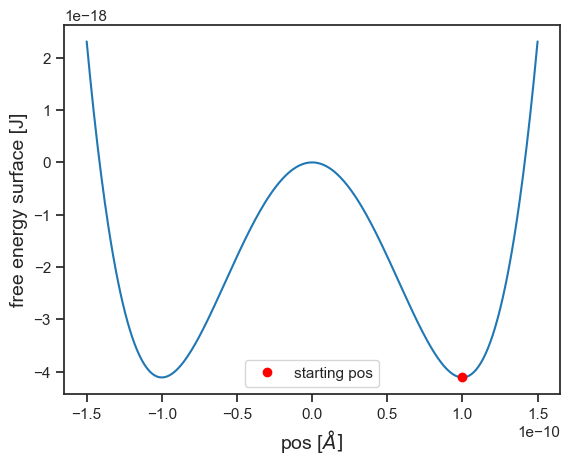

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

x = np.linspace(-1.5E-10, 1.5E-10, 376)
y = []
A = 4.11E22
B = 822
for i in x:
    y.append(A*i**4-B*i**2)

plt.plot(x,y)
pos = 1e-10
plt.plot(pos, A*pos**4-B*pos**2, 'ro', label="starting pos")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("free energy surface [J]")
plt.legend()


## pos vs time

589000 937142 without
324000 937143 without
471000 937144 without
386000 937145 without
401000 937146 without
415000 937147 without
496000 937148 without
593000 937149 without
475000 937150 without
337000 937151 without
441000 937152 without
431000 937153 without
450000 937154 without
463000 937155 without
581000 937156 without
379000 937142 with
289000 937143 with
402000 937144 with
367000 937145 with
456000 937146 with
350000 937147 with
323000 937148 with
417000 937149 with
310000 937150 with
451000 937151 with
528000 937152 with
449000 937153 with
447000 937154 with
282000 937155 with
494000 937156 with
without:456866
with:396266


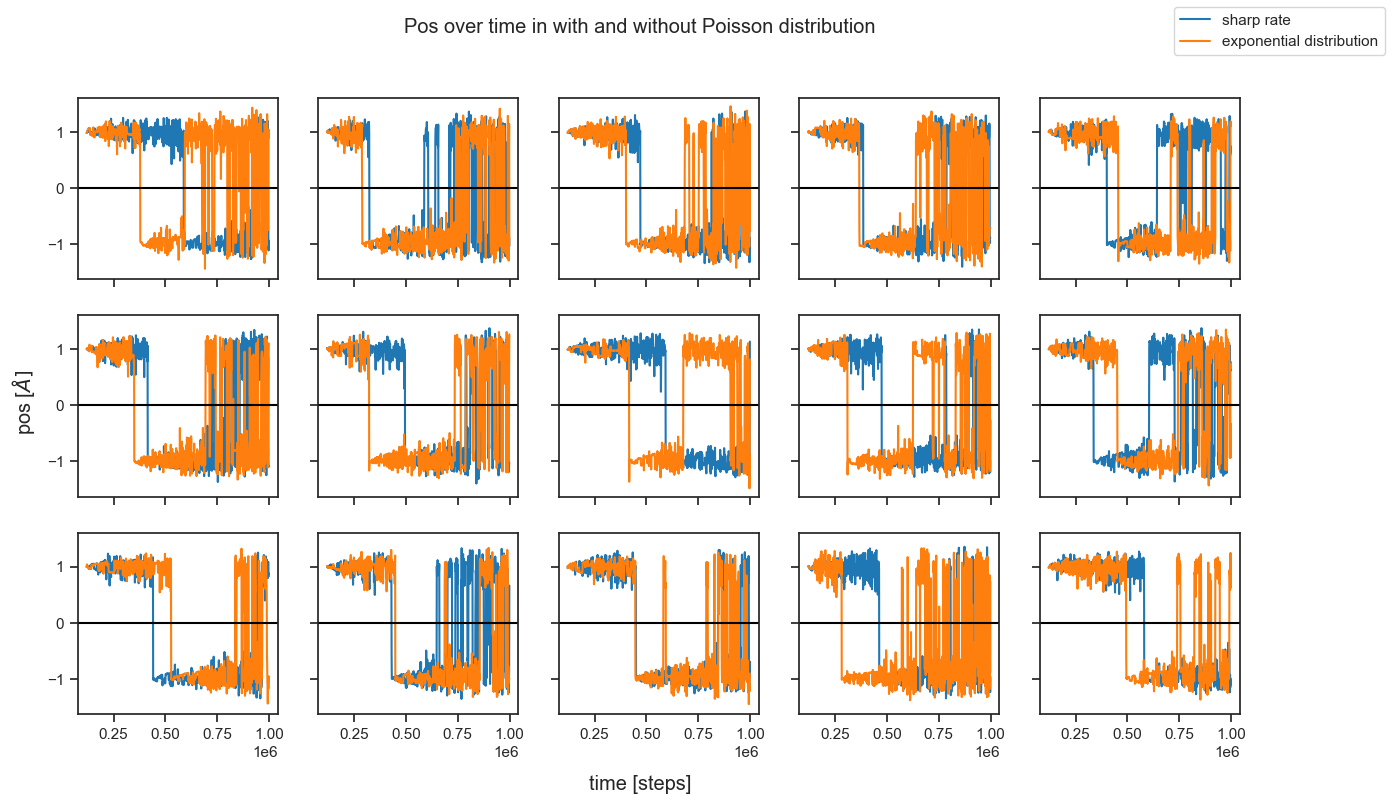

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

rows = 3 
colums = 5
fig, axes = plt.subplots(rows, colums, figsize=(15,8), sharex=True, sharey=True)

seeds = []
for i in range(0, 15):
  seeds.append(937142 + i)

sumWithout = 0
for i, seedNum in enumerate(seeds):
    xyz = open("SimForMetaD_lowDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    #plt.plot(time, posX, label=seedNum)
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "sharp rate")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[0,3].plot(time, posX)
        case 4:
            axes[0,4].plot(time, posX)
        case 5:
            axes[1,0].plot(time, posX)
        case 6:
            axes[1,1].plot(time, posX)
        case 7:
            axes[1,2].plot(time, posX)
        case 8:
            axes[1,3].plot(time, posX)
        case 9:
            axes[1,4].plot(time, posX)
        case 10:
            axes[2,0].plot(time, posX)
        case 11:
            axes[2,1].plot(time, posX)
        case 12:
            axes[2,2].plot(time, posX)
        case 13:
            axes[2,3].plot(time, posX)
        case 14:
            axes[2,4].plot(time, posX)

    for j in range(1, len(posX)):
        if(posX[j -1] * posX[j] < 0):
            sumWithout += time[j]
            print(str(int(time[j])) + " " + str(seedNum) +  " without")
            break


sumWith = 0            
for i, seedNum in enumerate(seeds):
    xyz = open("SimForMetaD_lowWithDistDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for j in xyz:
        line = j.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    match i:
        case 0:
            axes[0,0].plot(time, posX, label = "exponential distribution")
        case 1:
            axes[0,1].plot(time, posX)
        case 2:
            axes[0,2].plot(time, posX)
        case 3:
            axes[0,3].plot(time, posX)
        case 4:
            axes[0,4].plot(time, posX)
        case 5:
            axes[1,0].plot(time, posX)
        case 6:
            axes[1,1].plot(time, posX)
        case 7:
            axes[1,2].plot(time, posX)
        case 8:
            axes[1,3].plot(time, posX)
        case 9:
            axes[1,4].plot(time, posX)
        case 10:
            axes[2,0].plot(time, posX)
        case 11:
            axes[2,1].plot(time, posX)
        case 12:
            axes[2,2].plot(time, posX)
        case 13:
            axes[2,3].plot(time, posX)
        case 14:
            axes[2,4].plot(time, posX)

    for j in range(1, len(posX)):
        if(posX[j -1] * posX[j] < 0):
            sumWith += time[j]
            print(str(int(time[j])) + " " + str(seedNum) + " with")
            break

fig.suptitle("Pos over time in with and without Poisson distribution")
fig.supxlabel("time [steps]")
fig.supylabel(r"pos [$\AA ]$", x = 0.08)

for i in range(rows):
    for j in range(colums):
        axes[i][j].axhline(0, color = 'black')

print("without:" + str(int(sumWithout / (rows * colums))) + "\nwith:" + str(int(sumWith / (rows * colums))))
    
fig.legend()

## original free energy surface

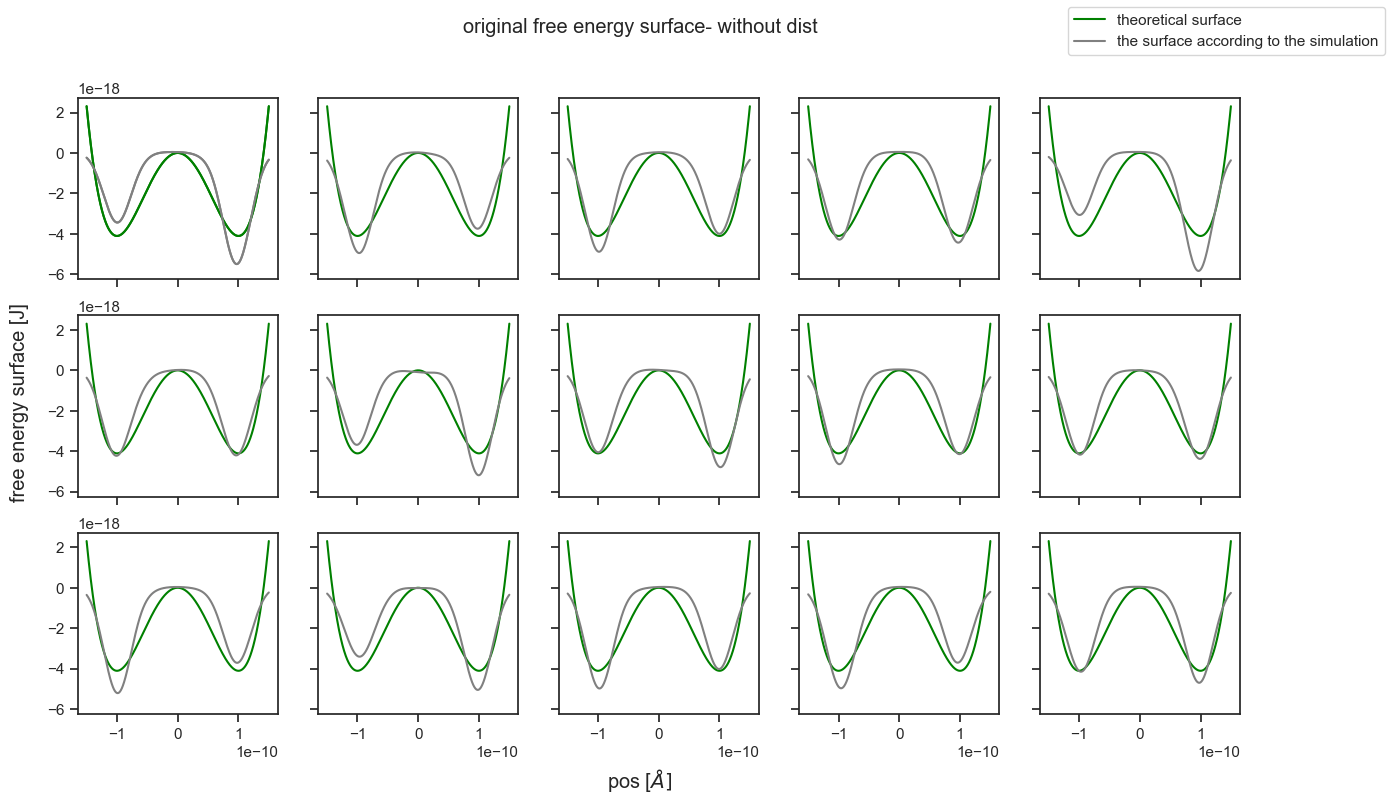

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

rows = 3 
colums = 5
fig, axes = plt.subplots(rows, colums, figsize=(15,8), sharex=True, sharey=True)

seeds = []
for i in range(0, 15):
  seeds.append(937142 + i)

x = np.linspace(-1.5E-10, 1.5E-10, 880)
w = 6E-20
sigma = 2e-11
y = []
A = 4.11E22
B = 822
for i in x:
    y.append(A*i**4-B*i**2)

A = []
for i, seedNum in enumerate(seeds): 
    df = pd.read_csv("gaussiansPos_3rd_" + str(i) + ".log", sep='\s+')
    #df = pd.read_csv("gaussiansPos.log", sep='\s+')
    pos = df['X']
    arr = []
    for j in x:
        arr.append(-w * np.exp(-(np.array(j-pos)) ** 2 / (2 * sigma ** 2)).sum(0) + 0.53e-19)
    A.append(arr)


fig.suptitle("original free energy surface- without dist")
fig.supxlabel(r"pos [$\AA ]$")
fig.supylabel(r"free energy surface [J]", x = 0.08)
c = 0
for i in range(rows):
    for j in range(colums):
        if(i == 0 and j == 0):
            axes[i][j].plot(x, y, color='green', label='theoretical surface')
            axes[i][j].plot(x, A[c], color='gray',label='the surface according to the simulation')
        axes[i][j].plot(x, y, color='green')
        axes[i][j].plot(x, A[c], color='gray')
        c += 1

fig.legend()


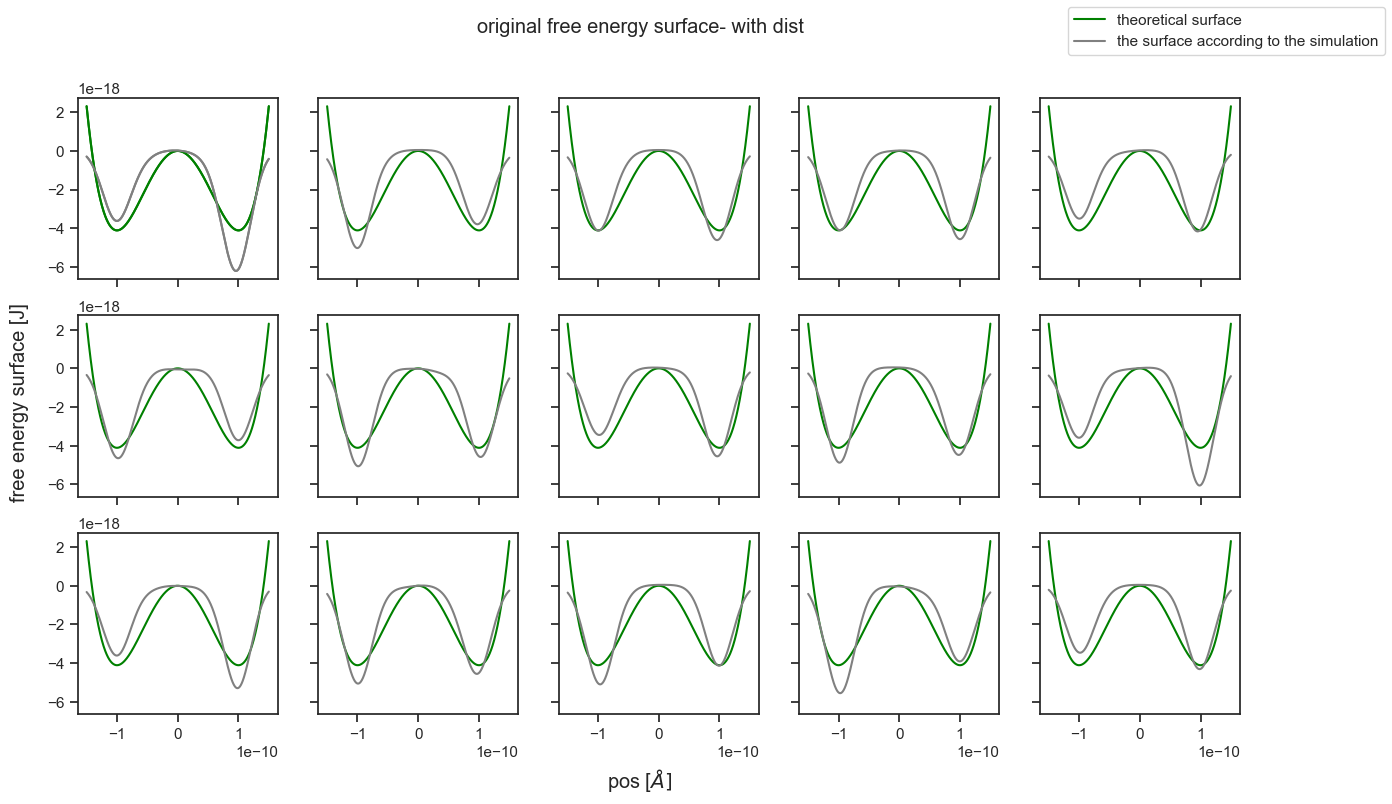

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

rows = 3 
colums = 5
fig, axes = plt.subplots(rows, colums, figsize=(15,8), sharex=True, sharey=True)

seeds = []
for i in range(0, 15):
  seeds.append(937142 + i)

x = np.linspace(-1.5E-10, 1.5E-10, 880)
w = 6E-20
sigma = 2e-11
y = []
A = 4.11E22
B = 822
for i in x:
    y.append(A*i**4-B*i**2)

A = []
for i, seedNum in enumerate(seeds): 
    df = pd.read_csv("gaussiansPos_4th_" + str(i) + ".log", sep='\s+')
    #df = pd.read_csv("gaussiansPos.log", sep='\s+')
    pos = df['X']
    arr = []
    for j in x:
        arr.append(-w * np.exp(-(np.array(j-pos)) ** 2 / (2 * sigma ** 2)).sum(0) + 0.53e-19)
    A.append(arr)


fig.suptitle("original free energy surface- with dist")
fig.supxlabel(r"pos [$\AA ]$")
fig.supylabel(r"free energy surface [J]", x = 0.08)
c = 0
for i in range(rows):
    for j in range(colums):
        if(i == 0 and j == 0):
            axes[i][j].plot(x, y, color='green', label='theoretical surface')
            axes[i][j].plot(x, A[c], color='gray',label='the surface according to the simulation')
        axes[i][j].plot(x, y, color='green')
        axes[i][j].plot(x, A[c], color='gray')
        c += 1

fig.legend()
